# Savoldi Chiara 5014502

# Bank Personal Loan Modelling

# Libraries required

In [26]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [27]:
bank = pd.read_csv("C://Users//kikis//Desktop//LASTYYYEAR//ml TESSERA//Nuova cartella//AI AND ML//Bank_Personal_Loan_Modelling.csv")

The dataset contains files from a bank whose management wants to explore ways to convert their passive customers into personal loan customers (while still keeping them as depositors). Last year, the bank launched a campaign for liability customers that showed a conversion rate of over 9% success. This encouraged the retail marketing department to design campaigns with better-targeted marketing to increase the success rate with a minimal budget.
The Bank.xls file contains data on 5000 customers. The data includes the customer's demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer's response to the latest personal loan campaign (Personal Loan). In particular:

1) ID client;

2) Customer’s age: it is an integer column;

3) Number of years of professional experience: integer column;

4) Annual income of the customer (dollars): integer column;

5) Home Address ZIP code: integer column;

6) Family size of the customer: integer column;

7) Average spending on credit cards per month (dollars): integer column;

8) Education Level. It can have 3 values: 

– 1: Undergrad;

– 2: Graduate;

– 3: Advanced / Professional;

9) Value of house mortgage (if any/dollars);

10) Did this customer accept the personal loan offered in the last campaign? it has only two values: 0 (no) & 1 (yes); 

11) Securities_account: Does the customer have a securities account with the bank? 

12) CD_Account: Does the customer have a certificate of deposit (A certificate of deposit (CD) is a savings account that holds a fixed amount of money for a fixed period of time, such as six months, one year, or five years, and in exchange, the issuing bank pays interest.) account with the bank?;

13) Online: Does the customer use internet banking facilities?;

14) CreditCard: Does the customer use a credit card issued by this Bank?

Securities_account, CD_Account, Online, and CreditCard are int datatype but with Binary inputs.
My objective is to predict whether a liability customer will buy a personal loan or not.

In [28]:
print(f"There are {bank.shape[0]} rows and {bank.shape[1]} columns in the dataset.")

np.random.seed(85) 
bank.sample(10) #Visualize only 10 rows.

There are 5000 rows and 14 columns in the dataset.


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3411,3412,63,37,118,94010,1,2.0,1,427,0,0,0,0,0
4241,4242,34,9,40,95054,4,2.0,2,0,0,0,0,1,1
2799,2800,64,39,85,94720,4,3.4,2,200,0,0,0,1,0
4132,4133,61,36,133,90266,1,2.6,1,0,0,0,0,1,0
3220,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0
1614,1615,47,23,89,94920,1,2.6,2,0,0,1,1,1,1
4992,4993,30,5,13,90037,4,0.5,3,0,0,0,0,0,0
3375,3376,43,18,88,90089,4,1.1,2,0,0,0,0,1,0
4023,4024,51,25,175,90089,3,0.7,1,312,1,0,0,0,0
793,794,24,-2,150,94720,2,2.0,1,0,0,0,0,1,0


In [29]:
bank['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

The first thing we can notice is the problem of 'The Unbalance dataset'. The classes are unbalanced means that more people said 'no' than those who said 'yes. This could create problems as my dataset will have a harder time learning when a person chooses to accept the campaign. This problem is called Classin balance.
As we can see, only about 9,6% of the observations were balanced. Therefore, if we always predict 0, we'd achieve an accuracy of 90%. I will work on this problem later.


# DATA SUMMARY

The info() function prints information about the index dtype and column dtypes, non-null values and memory usage. The 64 refers to the memory allocated to store data in each cell, which is related to how many digits it can store in each “cell”.

In [30]:
bank.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* Int64: 64 refers to the memory allocated to hold this character;
* Float64 refers to characters with decimals. If a column contains numbers and Na values, pandas will default to float64.

In [31]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


* The Mean and Median for 'Age' is almost equal to 45 years old;
* The minimum value for Mortgage is 0.0 for at least 50% of the customers: this could mean that half of the customers do not own a home, for example;
* Experience Column has a min value -3, which could be an error because it makes no sense for a person to have negative years of experience;
* CCavg minimum value is 0.0 dollars; suggesting that the customer may not have any credit cards.

## Exploration analysis:

## ZIP Code variable

In [32]:
#Check the number of uniques in the zip code to extract only the country where the customer is living.
print(bank['ZIP Code'])
bank['ZIP Code'].nunique()
print("\n")
print("We only have 467 unique values. It means that, for the remaining observations: 5000 - 467 = 4533, we have these 467 codes repeated.")

0       91107
1       90089
2       94720
3       94112
4       91330
        ...  
4995    92697
4996    92037
4997    93023
4998    90034
4999    92612
Name: ZIP Code, Length: 5000, dtype: int64


We only have 467 unique values. It means that, for the remaining observations: 5000 - 467 = 4533, we have these 467 codes repeated.


In US, the first digit of a PIN indicates the zone or a region, the second indicates the sub-zone, and the third, combined with the first two, indicates the sorting district within that zone. The final three digits are assigned to individual post offices within the sorting district. 
The goal is to consider only the first two digits of the zip code, in order to reduce the possibilities to 7 groups.

In [33]:
bank['ZIP Code'] = bank['ZIP Code'].astype(str)
bank['ZIP Code'] = bank['ZIP Code'].str[0:2]
zip_code = bank.groupby(['ZIP Code'])
print(zip_code.sum())
bank['ZIP Code'].nunique()

               ID    Age  Experience  Income  Family    CCAvg  Education  \
ZIP Code                                                                   
90        1802823  32177       14439   53513    1651  1356.13       1300   
91        1422344  25745       11483   42836    1315  1138.48       1087   
92        2357576  45034       20123   72821    2387  1920.28       1869   
93        1089792  19095        8562   30575     972   819.00        804   
94        3641224  66510       29363  107233    3588  2833.62       2762   
95        2085654  36399       15823   59336    1964  1555.41       1507   
96         103087   1732         730    2557     105    66.77         76   

          Mortgage  Personal Loan  Securities Account  CD Account  Online  \
ZIP Code                                                                    
90           38511             67                  74          37     409   
91           33407             55                  57          31     335   
92     

7

Now the ZIP Code types are reduced to: 90,91,92,93,94,95,96.

## Columns management

I have dropped to ID column since it is not relevant for the analysis.

In [34]:
bank.drop(['ID'],axis=1,inplace=True)

In [35]:
cols = set(bank.columns)
#I consider a group of only columns of int data type
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cols_categorical = list(cols - cols_numeric)
print(cols_categorical)
#I will select only the categorical columns:
bank['Education'] = bank['Education'].astype('category')
bank['Family'] = bank['Family'].astype('category')
bank['Personal Loan'] = bank['Personal Loan'].astype('category')
bank['Securities Account'] = bank['Securities Account'].astype('category')
bank['CD Account'] = bank['CD Account'].astype('category')
bank['Online'] = bank['Online'].astype('category')
bank['CreditCard'] = bank['CreditCard'].astype('category')
bank['ZIP Code'] = bank['ZIP Code'].astype('category')


['CD Account', 'Family', 'CreditCard', 'Securities Account', 'Personal Loan', 'Online', 'ZIP Code', 'Education']


Machine learning models require all variables to be numeric. My data contains categorical data and I must encode it to numbers before fitting and evaluating a model.

## Processing Columns

In [36]:
bank["Experience"][bank["Experience"]<0].count()

52

In [37]:
df = bank[bank["Experience"]>=0]
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91,4,1.0,2,0,0,0,0,0,1


The 'Experience' column refers to the number of years of work experience. There are 52 rows in the dataset that contain negative values. It is not possible for years to have a value smaller than zero, so I will delete those columns from my dataset.

## Missing Values:

In [38]:
#There are no missing values in the dataset.
bank.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Outliers:

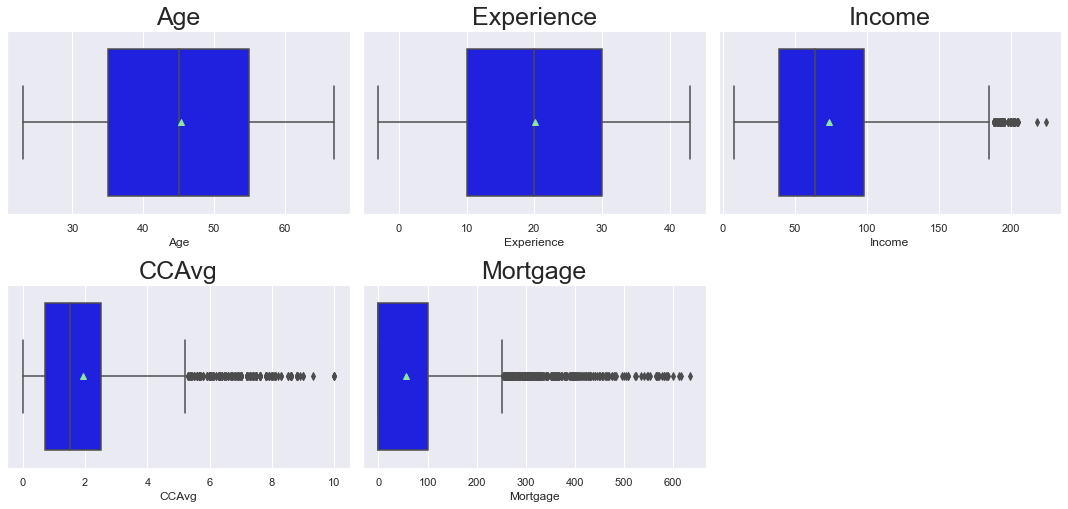

In [39]:
boxplot = bank.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,35))
for i in range(len(boxplot)):
    plt.subplot(10,3,i+1)
    sns.boxplot(bank[boxplot[i]],showmeans=True, color='blue')
    plt.tight_layout()
    plt.title(boxplot[i],fontsize=25)

plt.show()

Age and Experience are almost normally distributed and look quite similar.
As we observe, the three variables CCAvg, Mortgage and income present some outliers.
For some costumers, the annual income is greater than 180 dollars.
For people who own a mortgage: most of the values are 0 i.e. people decide not to own a mortgage, or they pay less than 100 dollars. There are a lot of outliers who pay more than 250 dollars.
The Average spending on credit cards per month is more than 5 dollars for many people.

The "interquartile range" (IQR) represents the width of the box in the boxplot, that is IQR = Q3 – Q1 . The IQR is used as a measure of how spread-out the values are.

The IQR tells how some of the other values are "too far" from the central value. These outliers are outside the range in which we expect them.
If a data point is below Q1 – 1.5×IQR or above Q3 + 1.5×IQR, it is viewed as being too far from the central values to be reasonable. 


In [40]:
def outliers(df,col):
   
    Q1 = df[col].quantile(0.25) #25th quantile
    Q3 = df[col].quantile(0.75)  #75th quantile
    IQR = Q3-Q1
    #This plots are also called Whisker Graph.
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) #the values smaller than Lower_Whisker will be assigned to Lower_whisker's value 
                                                            #the values above upper_whisker will be assigned to upper_Whisker's value. It is like the behavior of the boxplot,
                                                             #all the values that are outside the two final whiskers of the boxplot are assigned to Upper or Lower Whisker.
    return df

def all_outliers(df, col_list): #
    for c in col_list:
        df = outliers(df,c)
    return df 

In [41]:
no_outliers = {'Age','Experience'} #These two variables do not have outliers
col_with_outliers = [el for el in boxplot if el not in no_outliers] 
#Applying outlier treatment
bank = all_outliers(bank,col_with_outliers)

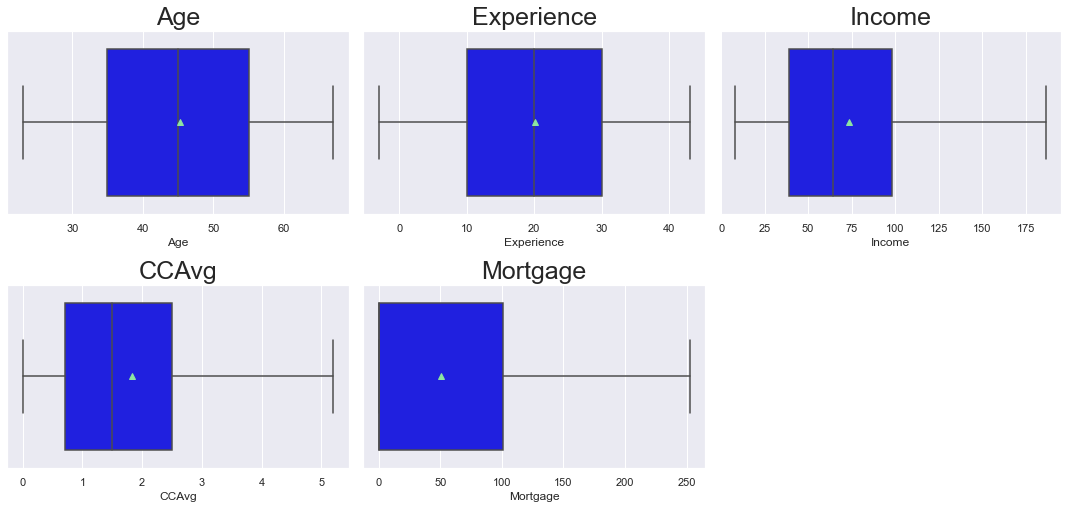

In [42]:
boxplot = bank.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15,35))
for i in range(len(boxplot)):
    plt.subplot(10,3,i+1)
    sns.boxplot(bank[boxplot[i]],showmeans=True, color='blue')
    plt.tight_layout()
    plt.title(boxplot[i],fontsize=25)

plt.show()

In [44]:
#It is possible to notice the degree of correlation of the variables with the target variable Y

correlation_matrix = bank.corr()
correlation_matrix['Personal Loan']

KeyError: 'Personal Loan'

By drawing the Plots again we can see that there are no more outliers and all values, for example for the mortgage, have been assigned between 0 and 100 dollars. The income values are assigned between 50 and 100 dollars. The CCAvg between 1 and 3.

In [18]:
bank_with_Y_N = bank.copy(deep=True) 
#Copy() function returns a copy of the DataFrame. 'Deep' attribute is True by default, which means that 
#any changes made to the copy will not be reflected in the original DataFrame.
bank_with_Y_N['Personal Loan'] = bank['Personal Loan'].replace({0: "No", 1:"Yes"})

I have renamed the 0 to 'No' and the 1 to 'Yes' for easier interpretation of the graphs.

In [19]:
bank_with_Y_N.value_counts()
print(bank_with_Y_N)

      Age  Experience  Income ZIP Code Family  CCAvg Education  Mortgage  \
0      25           1    49.0       91      4    1.6         1       0.0   
1      45          19    34.0       90      3    1.5         1       0.0   
2      39          15    11.0       94      1    1.0         1       0.0   
3      35           9   100.0       94      1    2.7         2       0.0   
4      35           8    45.0       91      4    1.0         2       0.0   
...   ...         ...     ...      ...    ...    ...       ...       ...   
4995   29           3    40.0       92      1    1.9         3       0.0   
4996   30           4    15.0       92      4    0.4         1      85.0   
4997   63          39    24.0       93      2    0.3         3       0.0   
4998   65          40    49.0       90      3    0.5         2       0.0   
4999   28           4    83.0       92      3    0.8         1       0.0   

     Personal Loan Securities Account CD Account Online CreditCard  
0               No

In [20]:
def probability_plot(var):
    sns.set(palette='pastel') #set the clours
    tab1 = pd.crosstab(var , bank_with_Y_N['Personal Loan'], margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(var, bank_with_Y_N['Personal Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.ylabel('Percentage')
    plt.show()

Personal Loan    No  Yes   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


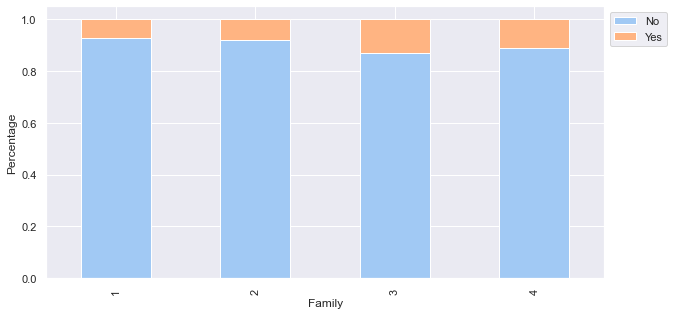

In [21]:
probability_plot(bank_with_Y_N['Family'])

It is interesting to plot on the x-axis each variable from the dataset, because for example, for 'Education' there are 3 levels, so you can see how many people, in the 3 levels, have said Yes to the campaign or No. It is interesting to understand how much the parameters are related to our variable y. One of the three levels may be more likely to answer Yes rather than No. The first type of family is more likely to choose NO: the light-blue coloured bar is the highest compared to the other types of families.

### Model Evaluation 
A model can make two kinds of wrong predictions:

1. Wrongly Identify customers as loan borrowers but they are not - False Positive;
2. Wrongly identifying customers as not borrowers but they actually buy loans - False Negative.

#### Creating a Confusion Matrix
The confusion matrix is a table with 4 different combinations of predicted and actual values.

It is extremely useful for measuring Recall, Precision, Specificity, Accuracy.
We have 4 possibilities TP, FP, FN, TN:

* True Positive: I have predicted positive(Yes or 1) and it’s true;
* True Negative: I have predicted negative and it is true;
* False Positive: I have predicted positive and it is false;
* False Negative: I have predicted negative and it is false.


In [22]:
#Defining a function for Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
sns.set(font_scale=2.0) # to set font size for the matrix
def view_confusion_matrix(y_actual,y_predict):

    cm = confusion_matrix(y_actual,y_predict)
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]   #we can flatten a matrix to one dimension.
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    #Choose label and colours
    sns.heatmap(cm, annot=labels, fmt='',cmap='Pastel1_r')
    plt.ylabel('Truth label')
    plt.xlabel('Predicted label')

## First Model - Logistic Regression:


In [23]:
#Importing all necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics #accuracy,confusion metrics, etc
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
#!pip install scipy --upgrade
#import statsmodels.api as sm


# LOGISTIC REGRESSION


In [24]:
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [25]:
## Defining X and Y variables
X = bank.drop(['Personal Loan'], axis=1) #dropping the dependent variable
Y = bank[['Personal Loan']]
X = pd.get_dummies(X, drop_first=True)  

#One-hot Encoding is a type of vector representation in which all of the elements in a vector are 0, except for one,
#which has 1 as its value, where 1 represents a boolean specifying a category of the element.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=29)
print(X_train.shape,X_test.shape)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

(3500, 20) (1500, 20)


LogisticRegression()

In [27]:
y_prediction = logreg.predict(X_test) #Make predictions on entire test data

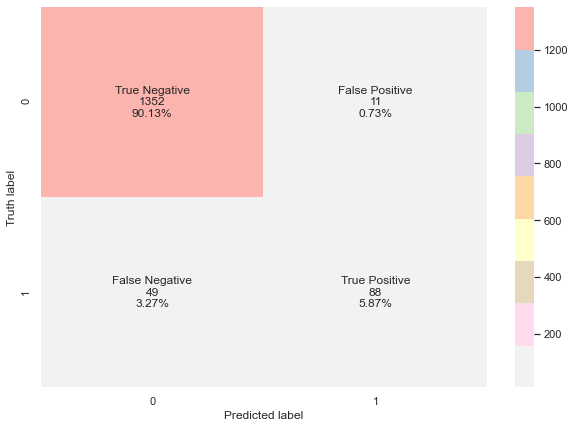

In [28]:
view_confusion_matrix(y_test,y_prediction)

The confusion matrix:

* 1352 the matrix has guessed that people were passive customers and they actually were;

* 11 times it has predicted people were active customers but they were passive;

* 49 times it has predicted people were passive costumers but they were active customers;

* 88 times the matrix has guessed by saying that people were active custmers and they actually were.



In [29]:
def scores(model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("Accuracy on training set : ",metrics.accuracy_score(y_train,y_pred_train))
    print("Accuracy on test set : ",metrics.accuracy_score(y_test,y_pred_test))

    print("\nRecall on training set : ",metrics.recall_score(y_train,y_pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,y_pred_test))
    
    print("\nPrecision on training set : ",metrics.precision_score(y_train,y_pred_train))
    print("Precision on test set : ",metrics.precision_score(y_test,y_pred_test))
    
    print("\nF1 on training set : ",metrics.f1_score(y_train,y_pred_train))
    print("F1 on test set : ",metrics.f1_score(y_test,y_pred_test))

scores(logreg)

Accuracy on training set :  0.9597142857142857
Accuracy on test set :  0.96

Recall on training set :  0.6938775510204082
Recall on test set :  0.6423357664233577

Precision on training set :  0.8686131386861314
Precision on test set :  0.8888888888888888

F1 on training set :  0.7714748784440844
F1 on test set :  0.7457627118644067


The Logistic Regression model has good accuracy by poor Recall values:
* Recall on training set :  0.6938775510204082
* Recall on test set :  0.6423357664233577.



### Logistic Regression Using Stats Model:

Statsmodels provides various functions for estimating different statistical models and performing statistical tests.
We have to follow these steps:
First, we define the set of dependent and independent variables. If the dependent variable is in non-numeric form, it is first converted to numeric using dummies. 
Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object.

In [30]:
#Libraries required
#!pip install --upgrade --no-deps statsmodels
#!pip3 install Literal
#!pip install typing_extensions#
#!pip3 uninstall statsmodels
#!pip3 install numpy scipy patsy pandas
#!pip install numpy scipy patsy pandas
#!pip install statsmodels

from typing import Literal
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Optimization terminated successfully.
         Current function value: 0.106585
         Iterations 11


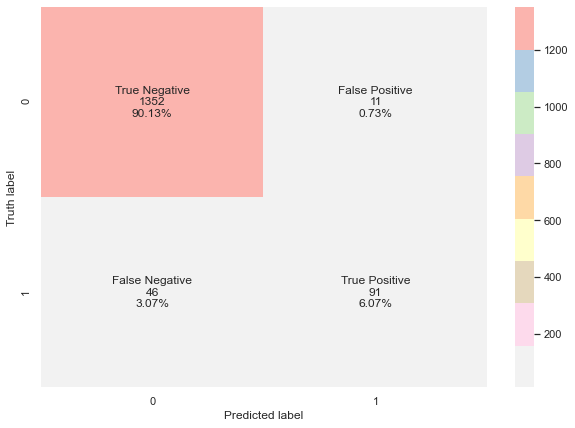

In [31]:
logit = sm.Logit(y_train, X_train) #logistic regression
lg = logit.fit(warn_convergence =False) 
yhat = lg.predict(X_test)
prediction = list(map(round, yhat))
view_confusion_matrix(y_test,prediction)


The confusion matrix:
* 1352 the matrix has guessed that people were passive customers and they actually were;
* 11 times it has predicted people were active customers but they were passive;

* 46 times it has predicted people were passive costumers but they were active customers;
* 91 times the matrix has guessed by saying that people were active custmers and they actually were.



In [32]:
pred = lg.predict(X_train)
pred_train = list(map(round,pred))
pred1 = lg.predict(X_test)
pred_test = list(map(round,pred1))

In [33]:
print("Accuracy on training set : ",accuracy_score(y_train,pred_train))
print("Accuracy on test set : ",accuracy_score(y_test,pred_test))
print("Recall on training set : ",recall_score(y_train,pred_train))
print("Recall on test set : ",recall_score(y_test,pred_test))
print("Precision on training set : ",precision_score(y_train,pred_train))
print("Precision on test set : ",precision_score(y_test ,pred_test))
print("F1 on training set : ",f1_score(y_train,pred_train))
print("F1 on test set : ",f1_score(y_test,pred_test))

Accuracy on training set :  0.9631428571428572
Accuracy on test set :  0.962
Recall on training set :  0.7201166180758017
Recall on test set :  0.6642335766423357
Precision on training set :  0.8821428571428571
Precision on test set :  0.8921568627450981
F1 on training set :  0.7929373996789727
F1 on test set :  0.7615062761506275


The confusion matrix has improved, successfully predicting correctlty 3 more of the observations in the dataset. 

# NEURAL NETWORK


Neural networks predict cases using a mathematical equation, where the output is the weighted sum of the inputs, after passing through the hidden layers. In each hidden unit the net input is passed through an activation function. 
Standardize features by removing the mean and scaling to unit variance.
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data.


In [34]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
#Fitting object
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(Y)
 
#Generating the standardized values of X and y
X = PredictorScalerFit.transform(X)
y = TargetVarScalerFit.transform(Y)
 
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
 
#Check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3500, 20)
(3500, 1)
(1500, 20)
(1500, 1)


In [35]:
#!pip install tensorflow
#!pip install keras

I want to have these levels:

-Hidden level 1: 5 neurons, ReLU activation;

-Hidden level 2: 5 neurons, Tanh activation;

-Hidden level 3: 1 neurons;

In [36]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
#First hidden layer: it is a dense layer with 5 neurons, the ReLU is the activation and the
#input depends on the input functions.
model.add(Dense(units=5,input_shape=(X_train.shape[1],) , kernel_initializer='normal', activation='relu'))

#Second layer of the model: it is a dense layer with 5 neurons, the tanh is the  activation function
model.add(Dense(units=5, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='tanh'))
 
#Third hidden layer
model.add(Dense(1,input_shape=(X_train.shape[1],), kernel_initializer='normal'))

#Compiling the model
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy'])

#Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 20)

Epoch 1/20
175/175 [==============================] - 16s 1ms/step - loss: 0.4109 - accuracy: 0.9083
Epoch 2/20
175/175 [==============================] - 0s 1ms/step - loss: 0.2311 - accuracy: 0.9050
Epoch 3/20
175/175 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.9384
Epoch 4/20
175/175 [==============================] - 0s 1ms/step - loss: 0.1377 - accuracy: 0.9592
Epoch 5/20
175/175 [==============================] - ETA: 0s - loss: 0.1401 - accuracy: 0.96 - 0s 1ms/step - loss: 0.1408 - accuracy: 0.9608
Epoch 6/20
175/175 [==============================] - 0s 1ms/step - loss: 0.1399 - accuracy: 0.9573
Epoch 7/20
175/175 [==============================] - 0s 1ms/step - loss: 0.1338 - accuracy: 0.9643
Epoch 8/20
175/175 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.9562
Epoch 9/20
175/175 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9643
Epoch 10/20
175/175 [==============================] - 0s

Before starting the training, I have to configure the model for
tell him which algorithm use to perform the optimization, which loss function to use, and what other metrics to monitor in addition to the loss function.

Configuring the model requires calling the model.compile function:

optimizer = 'sgd'

'sgd' refers to the descent of the stochastic gradient.

loss = 'binary_crossentropy'

The loss function for outputs taking the values 1 or 0 is called binary cross entropy.

metrics = ['accuracy']

Accuracy monitoring in addition to the leak function.

In [37]:
hist = model.fit(X_train, y_train,
          batch_size=32, epochs=100,
           validation_data=(X_test, y_test))

Epoch 1/100
110/110 [==============================] - 2s 11ms/step - loss: 0.0965 - accuracy: 0.9789 - val_loss: 0.0974 - val_accuracy: 0.9780
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9783 - val_loss: 0.0956 - val_accuracy: 0.9793
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0930 - accuracy: 0.9774 - val_loss: 0.0941 - val_accuracy: 0.9813
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 0.1055 - accuracy: 0.9709 - val_loss: 0.1116 - val_accuracy: 0.9687
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9654 - val_loss: 0.1112 - val_accuracy: 0.9760
Epoch 6/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1048 - accuracy: 0.9726 - val_loss: 0.1069 - val_accuracy: 0.9773
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1014 - accuracy: 0.9763 - val_loss: 0.0971 - val_accuracy: 0.979

By looking at the numbers, I should be able to see the loss increase/decrease and the accuracy increase/decrease over time.
I have defined the size of the batch and how long I would like to train it (epochs). I have specified the validation data so that the model tells me how it is working on the validation data at each point. This function will produce a history, which I have saved under the hist variable.

I wanted to try to see the changes by setting a smaller number of epochs:

In [38]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
 
model.add(Dense(units=5,input_shape=(X_train.shape[1],) , kernel_initializer='normal', activation='relu'))

model.add(Dense(units=5, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='tanh'))
 

model.add(Dense(1,input_shape=(X_train.shape[1],), kernel_initializer='normal'))
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics =['accuracy']) 
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=1)

Epoch 1/5
234/234 [==============================] - 1s 1ms/step - loss: 0.3831 - accuracy: 0.9037
Epoch 2/5
234/234 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9121
Epoch 3/5
234/234 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.9490
Epoch 4/5
234/234 [==============================] - 0s 1ms/step - loss: 0.1255 - accuracy: 0.9592
Epoch 5/5
234/234 [==============================] - 0s 1ms/step - loss: 0.1266 - accuracy: 0.9667


The model.evaluate function returns loss as the first element and accuracy as the second element. Accuracy is very high: 0.9760.


In [39]:
scores = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
    print(model.metrics_names[i], scores[i])

47/47 [==============================] - 0s 1ms/step - loss: 0.0987 - accuracy: 0.9760
loss 0.09865567833185196
accuracy 0.9760000109672546


It is possible to track the loss of training and the loss of val on the number of elapsed epochs. The first two lines say I want to plot the loss and val_loss. The third line specifies the title of this chart, “Model Loss”. The fourth and fifth lines tell us how the y and x axes should be labeled respectively. The sixth row includes a legend for the chart and the location of the legend will be on the top right:

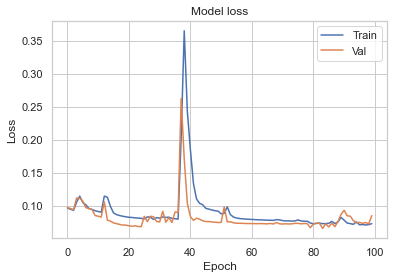

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

It is possible to track the accuracy of our training and the accuracy of validation:

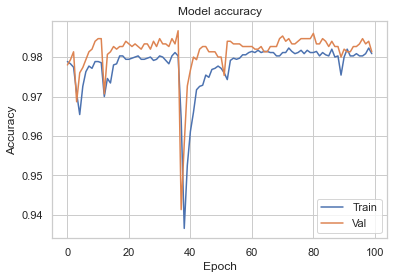

In [41]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

It is possible to introduce regularization into our neural network to adapt it to the training set. I used the Adam optimizer. Adam is one of the most common optimizers that adds some changes to the descent of the stochastic gradient in order to reach the lower loss function more quickly:

In [42]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape= (X_train.shape[1],)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'), ])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, y_train,
          batch_size=32, epochs = 15,
          validation_data=(X_test, y_test))

Epoch 1/15
110/110 [==============================] - 6s 45ms/step - loss: 0.2536 - accuracy: 0.9095 - val_loss: 0.0951 - val_accuracy: 0.9700
Epoch 2/15
110/110 [==============================] - 5s 43ms/step - loss: 0.0616 - accuracy: 0.9784 - val_loss: 0.0910 - val_accuracy: 0.9740
Epoch 3/15
110/110 [==============================] - 5s 50ms/step - loss: 0.0572 - accuracy: 0.9764 - val_loss: 0.0496 - val_accuracy: 0.9847
Epoch 4/15
110/110 [==============================] - 5s 44ms/step - loss: 0.0329 - accuracy: 0.9877 - val_loss: 0.0573 - val_accuracy: 0.9860
Epoch 5/15
110/110 [==============================] - 5s 42ms/step - loss: 0.0464 - accuracy: 0.9842 - val_loss: 0.0579 - val_accuracy: 0.9833
Epoch 6/15
110/110 [==============================] - 5s 42ms/step - loss: 0.0301 - accuracy: 0.9854 - val_loss: 0.0760 - val_accuracy: 0.9813
Epoch 7/15
110/110 [==============================] - 5s 44ms/step - loss: 0.0311 - accuracy: 0.9870 - val_loss: 0.0864 - val_accuracy: 0.9813

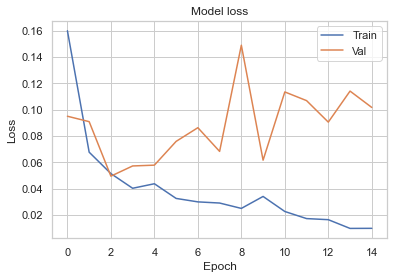

In [43]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

This is a clear sign of overfitting. The training loss is decreasing, but the validation loss is far above the training loss and increasing (beyond the epoch 2 inflection point).


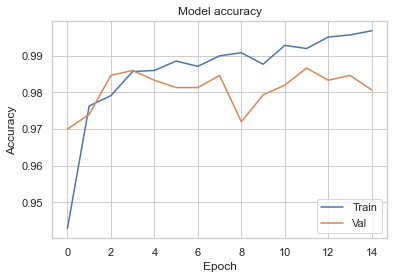

In [44]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

It is possible to try strategies to reduce overfitting (in addition to returning the architecture to the first model).
I will work on regularization and L2 dropout.
The reason I don't add the early stop here is because after using the first two strategies, the loss of validation doesn't take the U shape we saw in the chart and therefore the early stop won't be as effective.

First, let's import the code we need for L2 regularization and dropout:

In [45]:
from keras.layers import Dropout
from keras import regularizers


To add L2 regularization:

kernel_regularizer = regularizers.l2 (0.01)

This tells Keras to include the squared values of those parameters in the overall loss function and to weight them by 0.01 in the loss function.

  To add Dropout:

Dropout (0.3),

This means that the neurons in the previous layer have a 0.3 chance of dropping out during training.

In [46]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [48]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs= 50,
          validation_data=(X_test, y_test))

Epoch 1/50
110/110 [==============================] - 10s 74ms/step - loss: 12.2512 - accuracy: 0.8933 - val_loss: 0.3048 - val_accuracy: 0.9713
Epoch 2/50
110/110 [==============================] - 7s 64ms/step - loss: 0.2894 - accuracy: 0.9627 - val_loss: 0.2375 - val_accuracy: 0.9680
Epoch 3/50
110/110 [==============================] - 7s 62ms/step - loss: 0.2418 - accuracy: 0.9662 - val_loss: 0.2452 - val_accuracy: 0.9567
Epoch 4/50
110/110 [==============================] - 8s 73ms/step - loss: 0.2314 - accuracy: 0.9732 - val_loss: 0.2106 - val_accuracy: 0.9700
Epoch 5/50
110/110 [==============================] - 7s 68ms/step - loss: 0.2215 - accuracy: 0.9718 - val_loss: 0.2081 - val_accuracy: 0.9727
Epoch 6/50
110/110 [==============================] - 8s 68ms/step - loss: 0.2280 - accuracy: 0.9738 - val_loss: 0.2039 - val_accuracy: 0.9793
Epoch 7/50
110/110 [==============================] - 7s 65ms/step - loss: 0.2039 - accuracy: 0.9756 - val_loss: 0.2213 - val_accuracy: 0.96

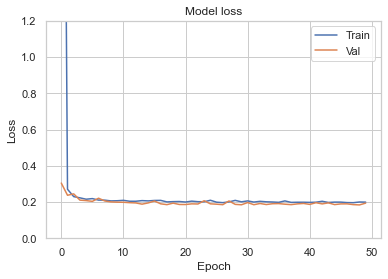

In [49]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

The loss is much higher in the beginning, and this is because I have changed the loss function.


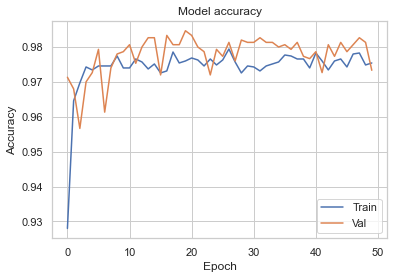

In [50]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Compared to our model in the Model 2, I have substantially reduced overfitting.

In [68]:
scores = model_3.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
    print(model_3.metrics_names[i], scores[i])

47/47 [==============================] - 1s 16ms/step - loss: 0.1942 - accuracy: 0.9733
loss 0.194168820977211
accuracy 0.9733333587646484


The accuracy of the model is even higher: 0.9733.

## CLASSIN BALANCE

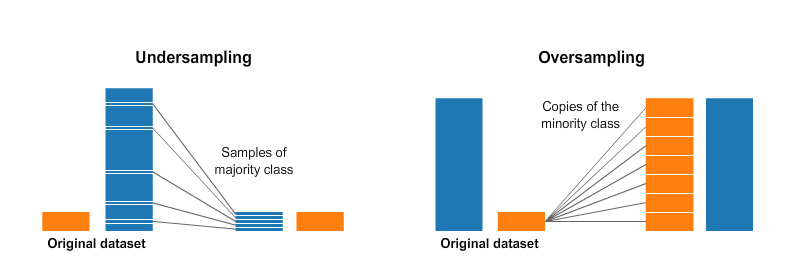

In [59]:
from IPython.display import Image
Image("C://Users//kikis//Desktop//LASTYYYEAR//ml TESSERA//Nuova cartella//AI AND ML//Sampling.png")

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists on removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set. 
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Both oversampling and undersampling involve introducing a bias (it results from an unfair sampling of a population, or from an estimation process that does not give accurate results on average) to select more samples from one class than another, to compensate for an imbalance that is either already present in the data, or likely to develop if a purely random sample were taken. Data Imbalance can be of the following types:
* Under-representation of a class in one or more important predictor variables;
* Under-representation of one class in the outcome (dependent) variable. 

Oversampling is generally employed more frequently than undersampling, especially when the detailed data has yet to be collected by survey. 

Oversampling techniques for classification problems are:

* Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes. 
* SMOTE to take a sample from the dataset, and consider its k nearest neighbors (in feature space).
* Th ADASYN algorithm by shifting the importance of the classification boundary to those minority classes which are difficult.

Undersampling techniques for classification problems are:

* Randomly remove samples from the majority class, with or without replacement. This is one of the earliest techniques used to alleviate imbalance in the dataset, however, it may increase the variance of the classifier and is very likely to discard useful or important samples. 
* Cluster centroids is a method that replaces cluster of samples by the cluster centroid of a K-means algorithm, where the number of clusters is set by the level of undersampling.
* Tomek links.
* Implementations.

0    4520
1     480
Name: Personal Loan, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

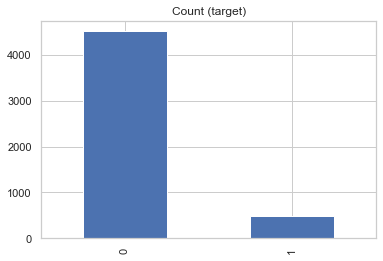

In [60]:
#Separate majority and minority classes
target_count = bank['Personal Loan'].value_counts()
print(target_count)
df_majority = bank[bank['Personal Loan']== 0]
df_minority = bank[bank['Personal Loan']== 1]
target_count.plot(kind='bar', title='Count (target)')

#### Over sampling

<AxesSubplot:title={'center':'Count (target)'}>

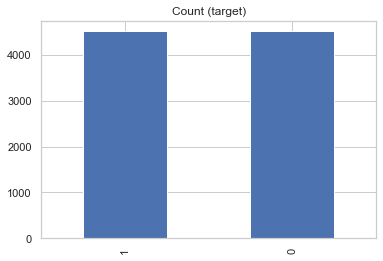

In [61]:
from pandas import Series, DataFrame 
from sklearn.utils import resample

#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     #sample with replacement
                                 n_samples=4520,    #to match majority class = to the number of samples of the majority
                                random_state=123) # reproducible results

#Combine majority class with upsampled minority class in a new sampled dataframe.
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
#Display new class counts
df_upsampled['Personal Loan'].value_counts()
df_upsampled['Personal Loan'].value_counts().plot(kind='bar', title='Count (target)')

#### Under sampling

<AxesSubplot:title={'center':'Count (target)'}>

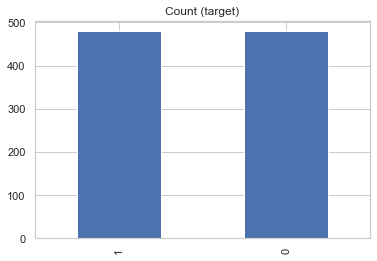

In [62]:
df_majority_upsampled = resample(df_majority, 
                                 replace=True, 
                                 n_samples=480,                             
                                random_state=123)                                

df_upsampled_maj = pd.concat([df_minority, df_majority_upsampled])
df_upsampled_maj['Personal Loan'].value_counts()
df_upsampled_maj['Personal Loan'].value_counts().plot(kind='bar', title='Count (target)')

In this case, I am creating exact copies of the minority/majority class records, but I can introduce small variations into those copies, creating more diverse synthetic samples.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. 

Unbalance dataset are prevalent in a multitude of fields and sectors, in partcular the financial services: from fraud to non-performing loan.
This will introduce a bias to select more samples from one class than from another. I am not sure I am going to work with thesame dataset. Making copies of existing lines, on the other hand, shouldn't lead to major alterations.

## SMOTE 

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from keras import utils as np_utils
from tensorflow.python.keras.utils import generic_utils

X = bank.drop('Personal Loan', axis=1)
y = bank['Personal Loan']
#The class can be majority, minority or auto
sm = SMOTE(sampling_strategy='auto', random_state=7)
oversampled_trainX, oversampled_testX, oversampled_trainY, oversampled_testY = train_test_split(X, y, test_size=0.3, random_state=0)
#Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(X, y)
print('After OverSampling, the shape of train_X: {}'.format(oversampled_trainX.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(oversampled_trainY.shape)) #They have the same shape.
#I will join the new df based on the union of the two train sets.
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train.columns = df_upsampled.columns

After OverSampling, the shape of train_X: (9040, 12)
After OverSampling, the shape of train_y: (9040,) 



Feature correlation is more obvious now: before solving the imbalance problem, most of the features can not show correlation that would surely affect the performance of the model. Since the correlation of features is really important to the overall performance of the model, it is important to correct the imbalance as it will also affect the performance of the ML model.

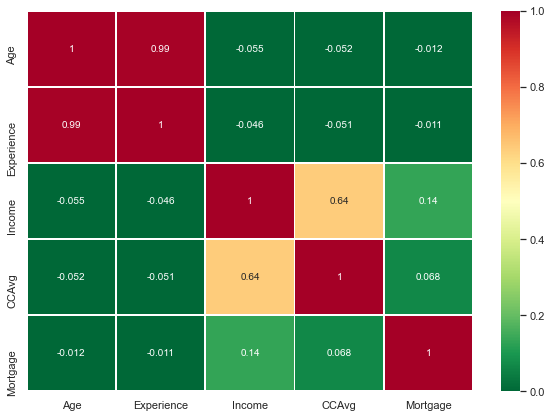

In [66]:
corr= bank.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot= True,vmin=0,vmax=1, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

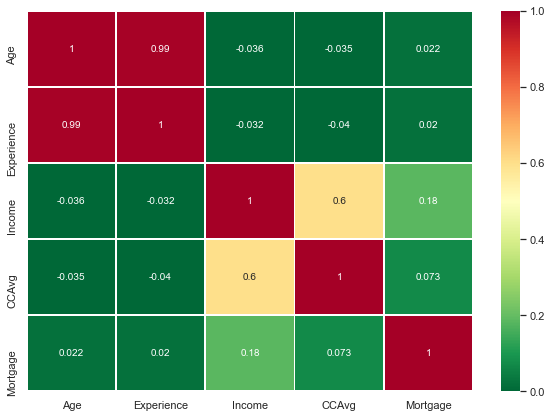

In [67]:
corr_sm = df_upsampled.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_sm,annot= True,vmin=0,vmax=1, cmap='RdYlGn_r',linewidths=0.75)
plt.show()

In my case, We can see that the correlation level has risen, without leading to noticeable changes:
For example, Mortgage an Age were correlated at about -0.012. Now we can see a positive correlation of 0.022.

Ensemble learning, in statistics and machine learning, is a set of ensemble methods that use multiple models to achieve better predictive performance with respect to the models it is made up of.
In the scikit-learn library there is an ensemble classifier called BaggingClassifier. However, this classifier does not allow to balance every subset of data. Therefore, when training on an unbalanced dataset, this classifier will favour the majority classes and create a skewed model.

To solve this problem, I can use BalancedBaggingClassifier from the imblearn library. It allows resampling of each subset of the dataset before training each estimator of the set. Therefore, BalancedBaggingClassifier accepts the same parameters as scikit-learn BaggingClassifier plus two other parameters, sampling_strategy and substitute that control the behavior of the random sampler.

In this way, I can train a classifier that will handle the imbalance without having to manually undersample or oversample before training.

In conclusion, everyone should know that the overall performance of ML models built on unbalanced data sets will be limited by its ability to predict rare and minority points. Identifying and resolving the imbalance of those points is crucial for the quality and performance of the generated models.

## Comparison of all Models 

In [70]:
All_models = {'Model':['Logistic Regression Model-sklearn','Logistic Regression Using Stats Model', 'Neural Network'],'Accuracy':[ 0.9597, 0.9631, 0.9733]}
comparison = pd.DataFrame(All_models)

comparison



,Model,Accuracy
0,Logistic Regression Model-sklearn,0.9597
1,Logistic Regression Using Stats Model,0.9631
2,Neural Network,0.9733


The objective of my project was to convert the liabilities of a bank, represented by the deposits of the clients, into assets, represented by the acceptance of a Personal Loan proposal from the bank. To achieve this, I developed different models to predict the choises of clients and analyze the most important variable that the bank has to take in account. The winner model is the third Neural Network. However, our dataset is unbalanced because it contains many more observations with a negative target (Personal_Loan = 0) than a positive one (Personal_loan = 1). The algorithm will therefore tend to always predict a large number of True Negatives. We have to deal with èrpblem like this.

However I can say that our results follow a real logical development. Marketing policies have to consider characteristics such as income or education when presenting the PL campaign to different customers. For example, We can observe that the higher the level of education, the higher the probability of taking a personal loan.  We can do the same reasoning for the other characteristics as well.